<a href="https://colab.research.google.com/github/GNuSeekK/ICTCOG/blob/main/3_07_%5B%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5%5D_%EC%95%99%EC%83%81%EB%B8%94_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블(Ensemble) 모델
* 머신러닝 앙상블이란? **여러 개의 머신 러닝 모델을 이용해서 최적의 답을 찾아내는 기법**
    * 여러 모델을 이용하여 데이터를 학습하고, 모든 모델의 예측 결과를 평균하여 결정

## 앙상블 모델의 종류
* 보팅(Voting) : 투표를 통해서 결과를 도출
* 배깅(Bagging) : 샘플 중복 생성을 통해 결과 도축 (부트스트랩 샘플링)
* 부스팅(boosting) : 이전 오차를 보완하면서 가중치를 부여
* 스태킹(Stacking) : 여러 모델을 기반으로 예측된 결과를 통해 meta 모델이 다시한번 도출
    * **meta**모델 : 대장 모델

# 데이터 로딩

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_boston
data = load_boston()

## 데이터 프레임

In [3]:
df = pd.DataFrame(
    data['data'],
    columns = data['feature_names']
)

df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Train / Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('MEDV', 1),
    df['MEDV'],
    random_state = 42
)

X_train.shape, y_train.shape

((379, 13), (379,))

## 평가지표 가져오기

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 모델별 성능 확인용 시각호

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
my_predictions = {}
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)
    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()
def mse_eval(name_, pred, actual):
    global predictions
    global colors
    plot_predictions(name_, pred, actual)
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    length = len(df)
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    plt.show()
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

# 계속 쓰기 힘들어서 내가 만든 함수
def prediction(label, regressor):
    reg = regressor
    reg.fit(X_train, y_train)

    pred = reg.predict(X_test)
    return mse_eval(label, pred, y_test)

# 앙상블 없이 단일 회귀 예측 모델 만들기

In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

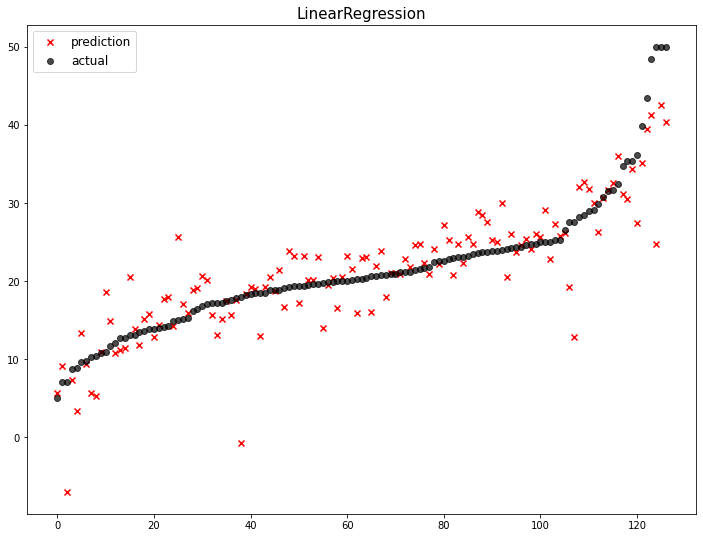

              model        mse
0  LinearRegression  22.098695


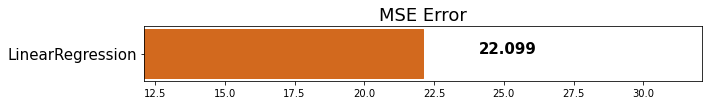

In [38]:
prediction('LinearRegression',LinearRegression())

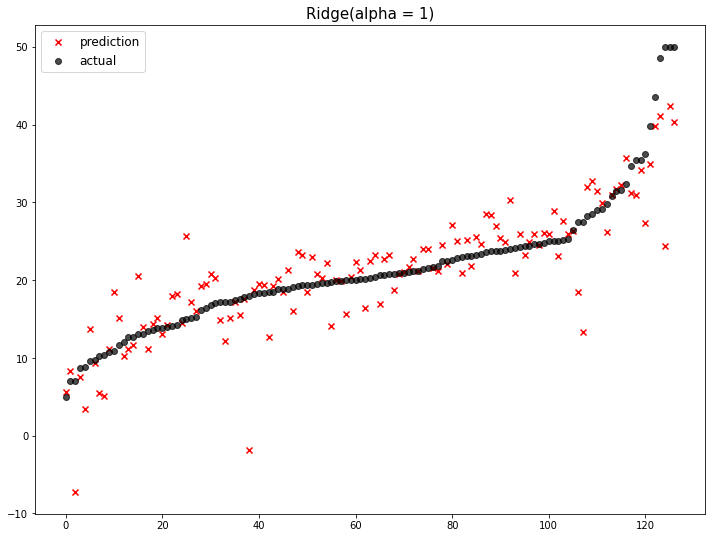

              model        mse
0  Ridge(alpha = 1)  22.480476
1  LinearRegression  22.098695


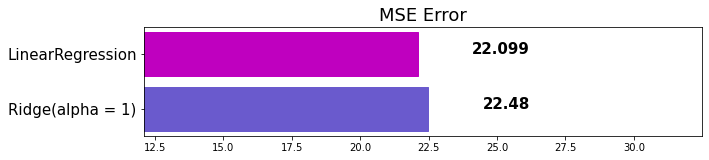

In [39]:
prediction('Ridge(alpha = 1)',Ridge(alpha = 1))

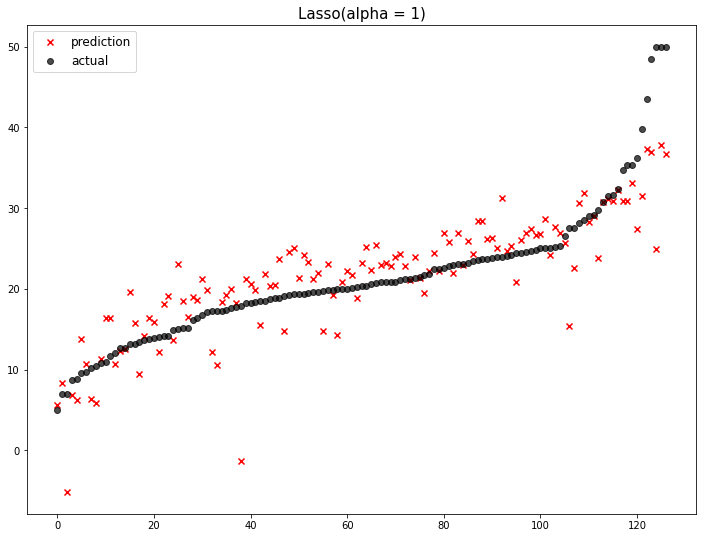

              model        mse
0  Lasso(alpha = 1)  24.390753
1  Ridge(alpha = 1)  22.480476
2  LinearRegression  22.098695


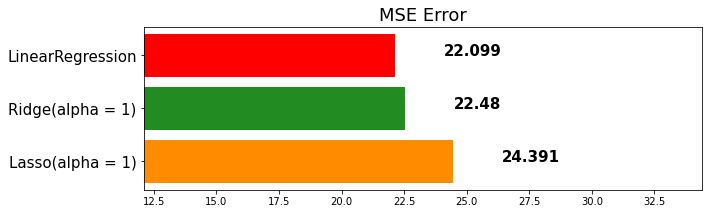

In [40]:
prediction('Lasso(alpha = 1)',Lasso(alpha = 1))

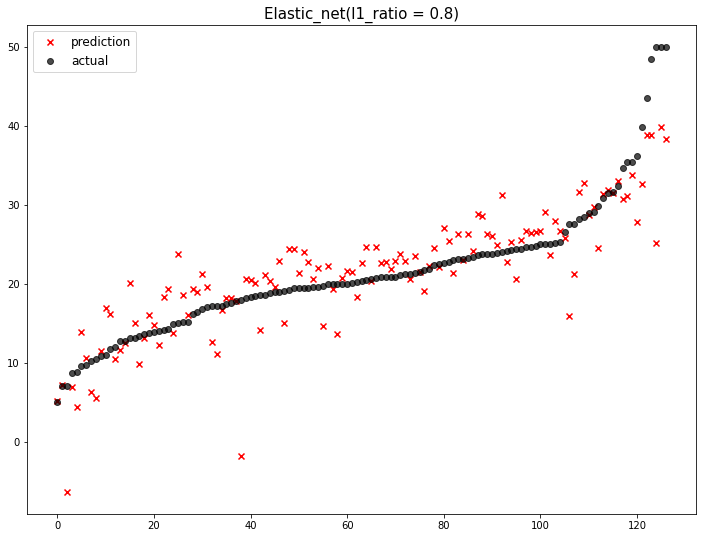

                         model        mse
0             Lasso(alpha = 1)  24.390753
1  Elastic_net(l1_ratio = 0.8)  23.132634
2             Ridge(alpha = 1)  22.480476
3             LinearRegression  22.098695


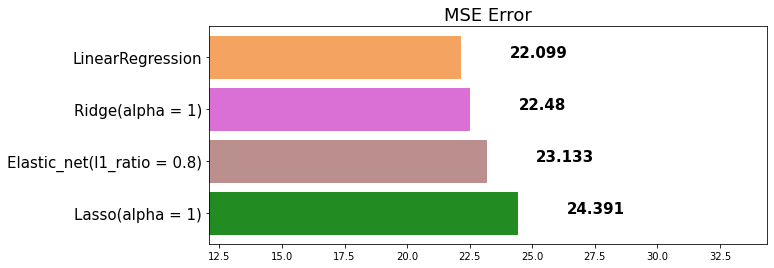

In [42]:
prediction('Elastic_net(l1_ratio = 0.8)',ElasticNet(alpha = 0.5, l1_ratio = 0.6))

# 앙상블(Ensemble)

## 1. 보팅(voting) 회귀(Regression)
**투표를 통해 결정하는 방식**
* Voting은 서로 다른 알고리즘 모델을 조합해서 사용
* Bagging은 서로 같은 알고리즘 내에서 다른 샘플 조합을 사용

In [43]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

반드시 모델들을 Tuple 형태로 모델을 정의

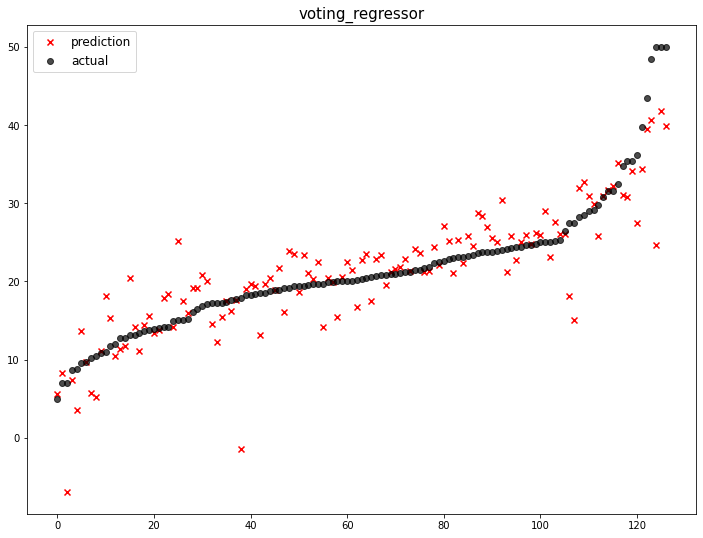

                         model        mse
0             Lasso(alpha = 1)  24.390753
1  Elastic_net(l1_ratio = 0.8)  23.132634
2             Ridge(alpha = 1)  22.480476
3             LinearRegression  22.098695
4             voting_regressor  21.970337


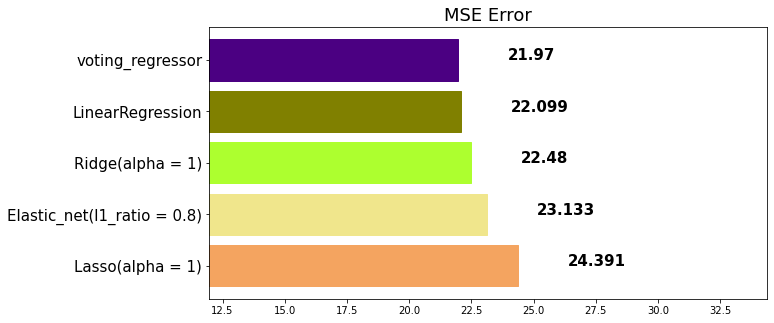

In [44]:
single_models = [
    ('linear_reg', lin),
    ('my_ridge', ridge),
    ('your_lasso', lasso),
    ('our_elastic', elastic_net)
]

voting_regressor = VotingRegressor(
    single_models
)

prediction('voting_regressor',voting_regressor)

## 2. 보팅(Voting) 분류 (Classification)
`voting = {'hard', 'soft'}` 하이퍼 파라미터가 존재
* **hard voting**
    * 결과 값에 대한 다수 class를 선택
    * 분류에 대한 예측값이 5개의 모델인 경우 `[1,1,0,0,1]`이 나온 경우 `1`번 클래스가 예측한게 다수니까 `1`로 결정이 된다.
* **soft voting**
    * 각 클래스의 확률의 평균 값을 계산하고, 그 평균값이 가장 높은 값으로 선택
    * 5개의 모델을 앙상블 해서 나온 클래스가 0이 나올 확률 = `[0.4, 0.9, 0.9, 0.4, 0.4]`
        * 0번 클래스 결정될 평균 확률 : `(0.4 + 0.9 + 0.9 + 0.4 + 0.4) / 5 = 0.6`
    * 5개의 모델을 앙상블 해서 나온 클래스가 1이 나올 확률 = `[0.6, 0.1, 0.1, 0.6, 0.6]`
        * 1번 클래스 결정될 평균 확률 : `(0.6 + 0.1 + 0.1 + 0.6 + 0.6) / 5 = 0.4`

In [16]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

models = [
    ('logistic', LogisticRegression()),
    ('svc', SVC())
]

# hard voting
vc = VotingClassifier(models, voting = 'hard')

# soft voting
vc = VotingClassifier(models, voting = 'soft')

Voting의 가장 큰 특징은 서로 다른 모델을 융합해서 투표

## 배깅(Bagging)

Bagging : **Boostrap Aggregating**의 줄임말
* Bootstrap = Sample + Aggregating = 합산

Bootstrap은 여러 개의 데이터 세트를 중첩을 허용하게 하여 샘플링을 분할하는 방식

## 부트스트랩 샘플링
원본 데이터 세트의 구성이 `[1, 2, 3, 4, 5]`
1. group1 = `[1, 2, 3]`
2. group2 = `[3, 4, 5]`
3. group3 = `[2, 3, 5]`
4. group4 = `[1, 1, 3]` 중복도 허용!

위 처럼 선택된 (group화 된) 샘플을 이용해서 여러 개의 모델을 단일 종류 알고리즘으로 만드는 방식 - Bagging

**Voting vs Bagging**
1. Voting은 **여러 알고리즘의 조합**에 대한 앙상블
2. Bagging은 하나의 **단일 알고리즘**에 대하여 **여러 개의 샘플 조합**으로 앙상블

### Bagging의 대표 주자 - RandomForest
* DecisionTree 기반 Bagging 앙상블
* 인기있는 알고리즘
* 사용하기 쉽다, 성능 우수
* 트리 기반 알고리즘이라 스케일링 필요 없음

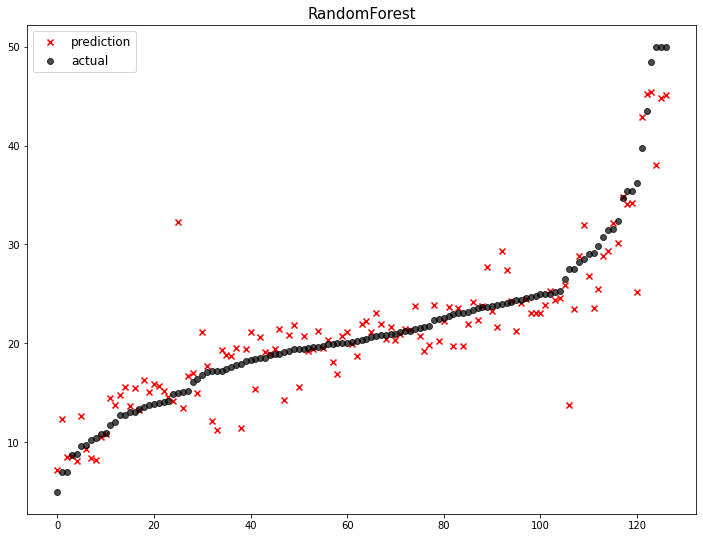

                         model        mse
0             Lasso(alpha = 1)  24.390753
1  Elastic_net(l1_ratio = 0.8)  23.132634
2             Ridge(alpha = 1)  22.480476
3             LinearRegression  22.098695
4             voting_regressor  21.970337
5                 RandomForest  11.121134


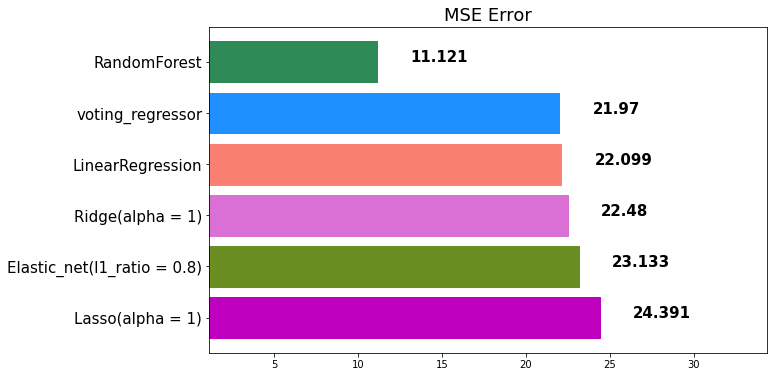

In [47]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

rft = RandomForestRegressor()
prediction('RandomForest', rft)

### BaggingRegressor, BaggingClassifier
* 랜덤 포레스트가 배깅 앙상블의 대표주자이긴 하지만
* 다른 모델을 Bagging 하고 싶을 때도 있음!

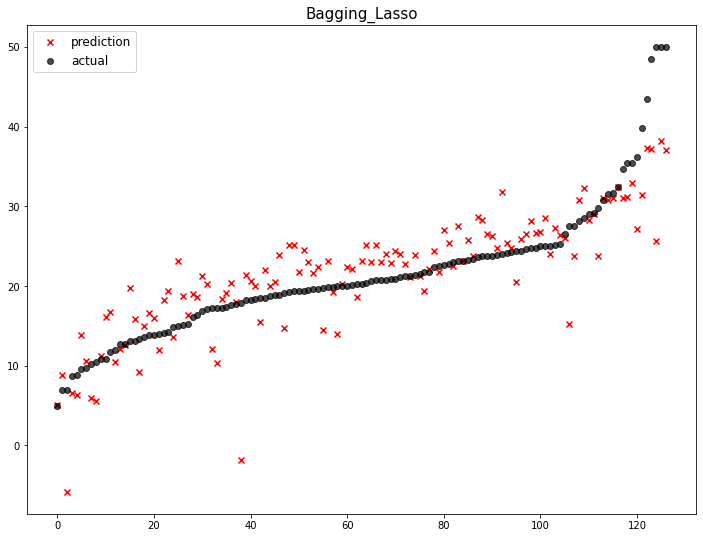

                         model        mse
0                Bagging_Lasso  24.869452
1             Lasso(alpha = 1)  24.390753
2  Elastic_net(l1_ratio = 0.8)  23.132634
3             Ridge(alpha = 1)  22.480476
4             LinearRegression  22.098695
5             voting_regressor  21.970337
6                 RandomForest  11.121134


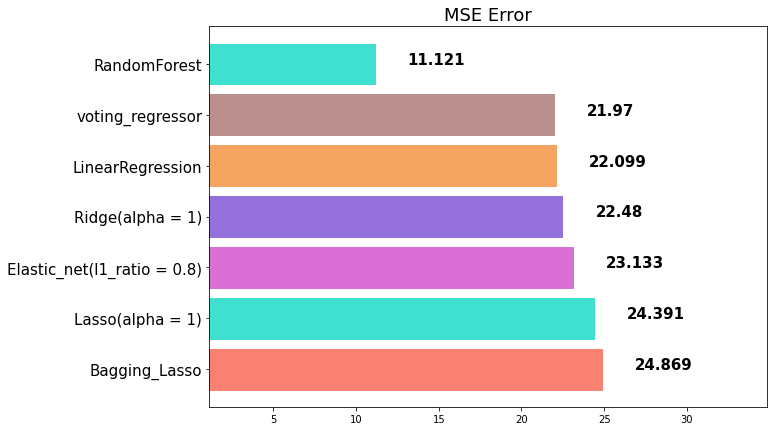

In [48]:
from sklearn.ensemble import BaggingRegressor


prediction('Bagging_Lasso',BaggingRegressor(base_estimator = Lasso()))

## 부스팅 (Boosting)
Weak Learner (약한 학습기)를 여러 개 이어 붙여서 점점 오차를 보완해 나가는 방식
* 약한 학습기를 순차적으로 학습을 시켜서, 이전 학습에 대해서 잘못 예측된 데이터에 대해서 **가중치**를 부여해 가면서 오차를 보완해 나가는 방식
* 장점
    * 성능이 우수함
* 단점
    * 오분류(`classification의 오차`), 잔차(`regression의 오차`)를 보완 하려고 하기 때문에 **잘못된 레이블링이나 아웃라이어에 대해 필요이상으로 민감** => 과적합 되기 쉬움
    * 다른 앙상블 기법 대비 **학습 시간이 오래 걸린다**

**대표적인 Boosting 앙상블**
1. AdaBoost
2. GradientBoost
3. LightGBM(LGBM)
4. XGBoost

### GradientBoost
* 성능이 우수
* 학습시간이 너무 오래 걸린다.

In [22]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

1. `learning_rate` : 약한 학습기의 학습률을 담당
    * `learning_rate` 증가할수록 오차를 많이 수정
    * `learning_rate` 감소할수록 오차를 적게 수정

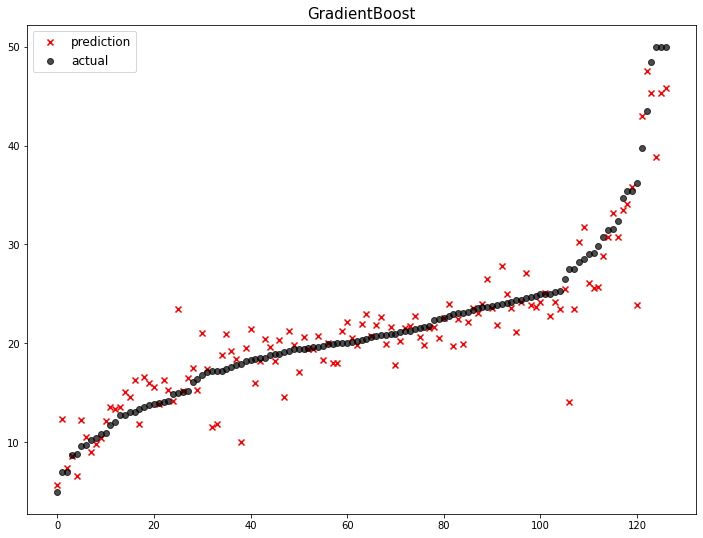

                         model        mse
0                Bagging_Lasso  24.869452
1             Lasso(alpha = 1)  24.390753
2  Elastic_net(l1_ratio = 0.8)  23.132634
3             Ridge(alpha = 1)  22.480476
4             LinearRegression  22.098695
5             voting_regressor  21.970337
6                 RandomForest  11.121134
7                GradientBoost   8.956141


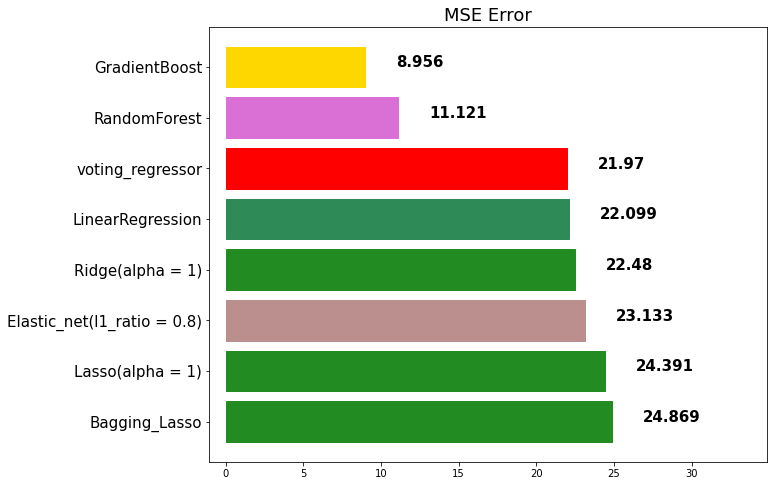

In [50]:
gbr = GradientBoostingRegressor(random_state=42)

prediction('GradientBoost', gbr)

### XGBoost (eXtream Gradient Boosting)
* 사이킷런 패키지가 아님!
* 성능이 우수하며, Gradient Boosting 보다 속도가 약간 빠르고, 성능도 향상 되었다.
* 학습 시간은 여전히 느린편

In [24]:
from xgboost import XGBRegressor, XGBClassifier

[13:15:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


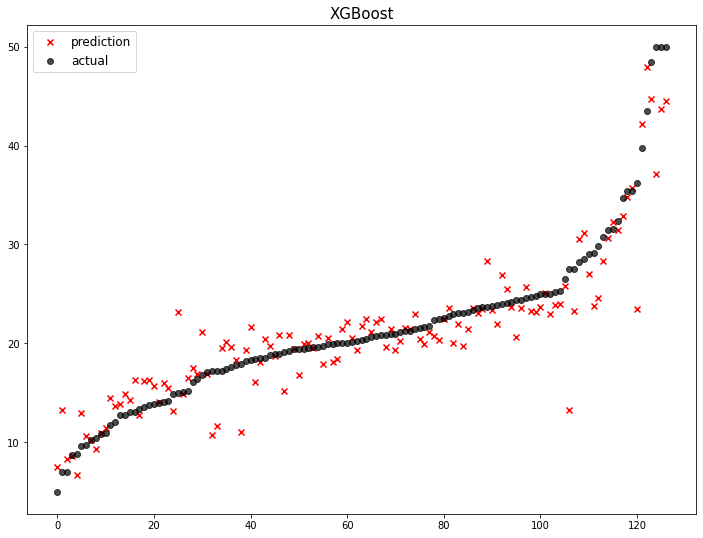

                         model        mse
0                Bagging_Lasso  24.869452
1             Lasso(alpha = 1)  24.390753
2  Elastic_net(l1_ratio = 0.8)  23.132634
3             Ridge(alpha = 1)  22.480476
4             LinearRegression  22.098695
5             voting_regressor  21.970337
6                 RandomForest  11.121134
7                      XGBoost  10.118980
8                GradientBoost   8.956141


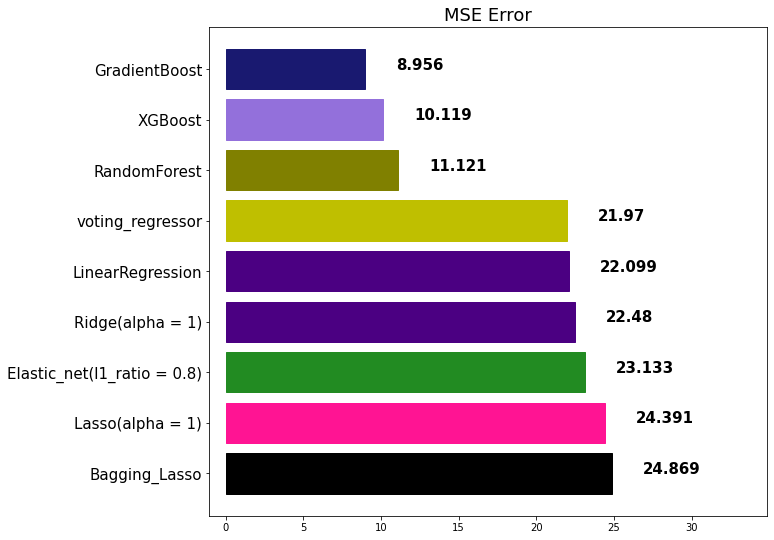

In [51]:
xgb = XGBRegressor(random_state=42)

prediction('XGBoost', xgb)

### LightGBM
* 사이킷런 패키지가 아님
* 성능이 우수하고 속도가 빠르다.
* XGBoost 다음 세대

In [26]:
from lightgbm import LGBMRegressor, LGBMClassifier

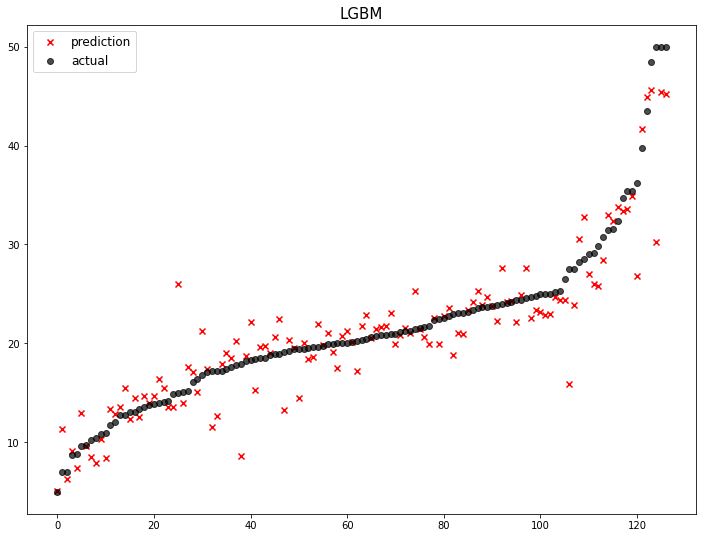

                         model        mse
0                Bagging_Lasso  24.869452
1             Lasso(alpha = 1)  24.390753
2  Elastic_net(l1_ratio = 0.8)  23.132634
3             Ridge(alpha = 1)  22.480476
4             LinearRegression  22.098695
5             voting_regressor  21.970337
6                 RandomForest  11.121134
7                         LGBM  10.937726
8                      XGBoost  10.118980
9                GradientBoost   8.956141


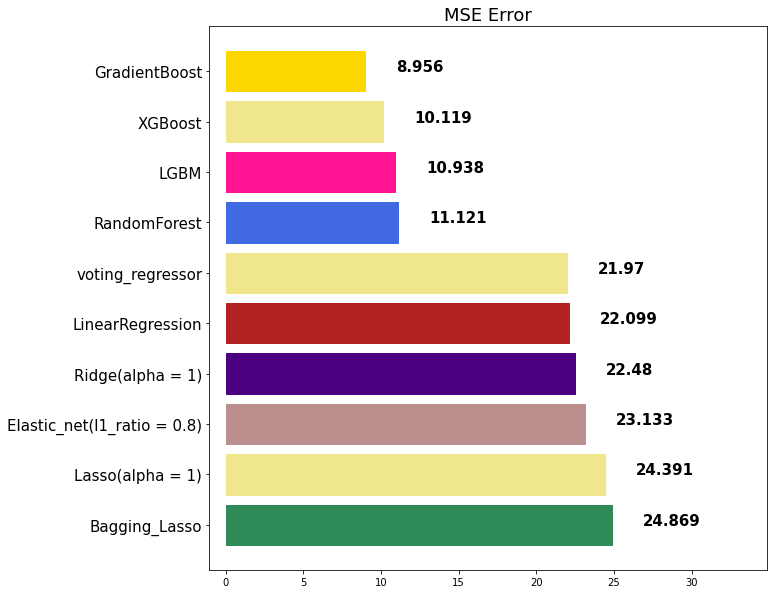

In [52]:
lgbm = LGBMRegressor(random_state = 42)

prediction('LGBM', lgbm)

## AdaBoost
Adaptive + Boosting (적응형 부스팅 방식)
* LightGBM, XGBoost : GradientBoosting에서 평가방식을 튜닝한 모델
* 학습률 (learning rate)을 학습에 따라서 자동으로 조절해 나가는 방식

In [28]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

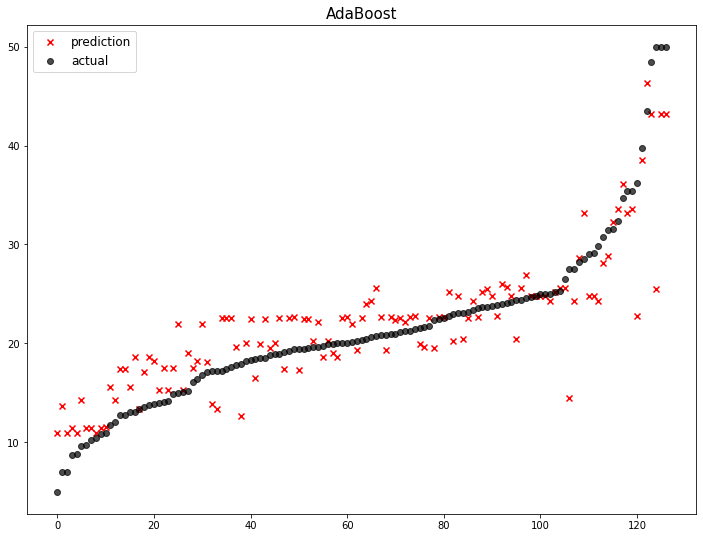

                          model        mse
0                 Bagging_Lasso  24.869452
1              Lasso(alpha = 1)  24.390753
2   Elastic_net(l1_ratio = 0.8)  23.132634
3              Ridge(alpha = 1)  22.480476
4              LinearRegression  22.098695
5              voting_regressor  21.970337
6                      AdaBoost  16.028607
7                  RandomForest  11.121134
8                          LGBM  10.937726
9                       XGBoost  10.118980
10                GradientBoost   8.956141


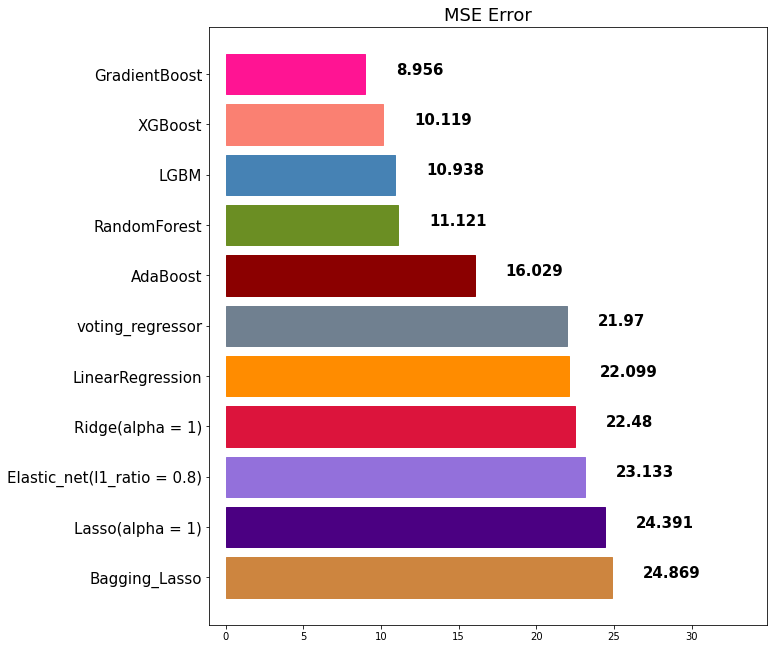

In [53]:
adb = AdaBoostRegressor(random_state = 42)

prediction('AdaBoost', adb)

## Stacking
개별 모델이 예측한 데이터를 기반으로 **final_estimator**가 종합해서 예측을 수행
* 성능을 극한까지 끌어올리고 싶을 때 이용
* 데이터 세트가 작을 경우 과대 적합 위험

[13:16:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


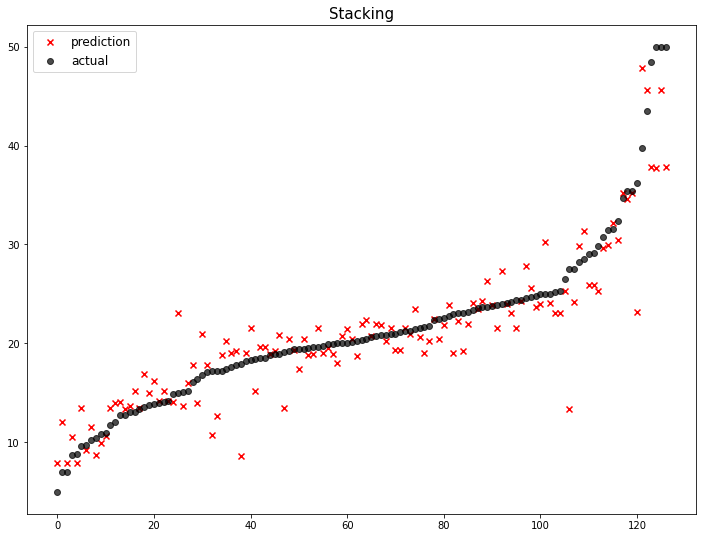

                          model        mse
0                 Bagging_Lasso  24.869452
1              Lasso(alpha = 1)  24.390753
2   Elastic_net(l1_ratio = 0.8)  23.132634
3              Ridge(alpha = 1)  22.480476
4              LinearRegression  22.098695
5              voting_regressor  21.970337
6                      AdaBoost  16.028607
7                      Stacking  12.050316
8                  RandomForest  11.121134
9                          LGBM  10.937726
10                      XGBoost  10.118980
11                GradientBoost   8.956141


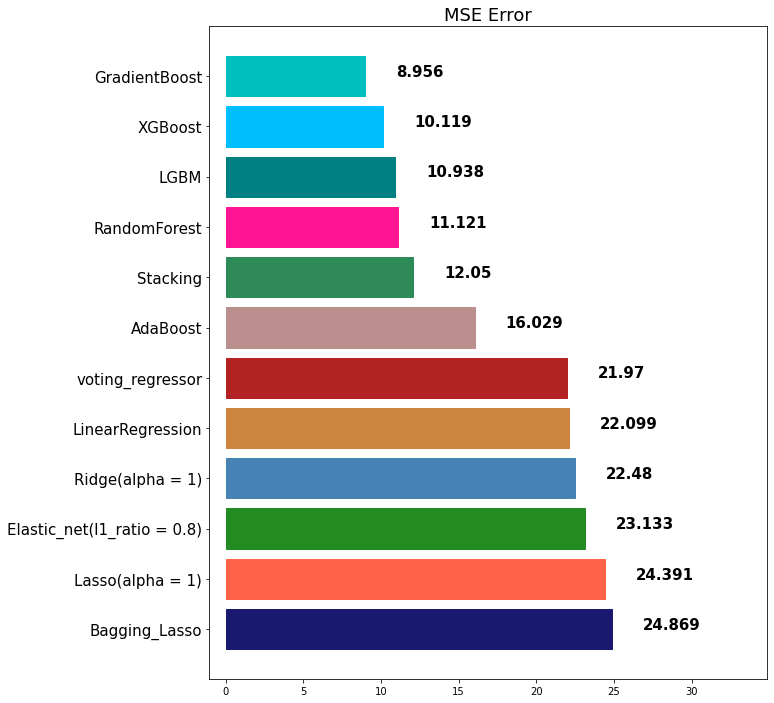

In [54]:
from sklearn.ensemble import StackingClassifier, StackingRegressor

stack_model = [
    ('randomforest', rft),
    ('gbr', gbr),
    ('lgbm', lgbm)
]
stack_reg = StackingRegressor(stack_model, final_estimator = xgb, n_jobs = -1)

prediction('Stacking', stack_reg)